# CS 181 Practical, Spring 2023
### Group: Omar Siddiqui & Omar Abdel Haq

This notebook contains starter code to:


*   **Load all of the data files** directly into your Colab runtime from the GCP bucket (so you don't need to download them to your computer!)
*   **Install libraries** inline, so you don't need to install them to your computer!




# Before you run this code:

1.   **Change your Runtime to use a GPU**: Click "Runtime" -> "Change Runtime Type", and select "GPU".
2.   **Stop Colab from disconnecting**:  To prevent Google Colab from disconnecting while you're away,  you can add an auto-click function using the Chrome console Just "Inspect", navigate to the "Console" and paste in this function:

```
function ClickConnect(){
    console.log("Clicked on connect button");
    document.querySelector("#ok").click()
}
setInterval(ClickConnect,60000)
```







In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Load the data files into local memory from the GCP bucket.

In [ ]:
!gsutil cp gs://cs181_practical_data/Xtrain_amp.npy ./
!gsutil cp gs://cs181_practical_data/ytrain_amp.npy ./

!gsutil cp gs://cs181_practical_data/Xtest_amp.npy ./
!gsutil cp gs://cs181_practical_data/ytest_amp.npy ./

!gsutil cp gs://cs181_practical_data/Xtrain_mel.npy ./
!gsutil cp gs://cs181_practical_data/ytrain_mel.npy ./

!gsutil cp gs://cs181_practical_data/Xtest_mel.npy ./
!gsutil cp gs://cs181_practical_data/ytest_mel.npy ./

Copying gs://cs181_practical_data/Xtrain_amp.npy...
==> NOTE: You are downloading one or more large file(s), which would            
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

\ [1 files][934.2 MiB/934.2 MiB]                                                
Operation completed over 1 objects/934.2 MiB.                                    
Copying gs://cs181_practical_data/ytrain_amp.npy...
/ [1 files][ 43.5 KiB/ 43.5 KiB]                                                
Operation completed over 1 objects/43.5 KiB.                                     
Copying gs://cs181_practical_data/Xtest_amp.npy...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

/ [1 files][369.6

### Load raw amplitude data as a numpy object.

In [ ]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

# Examine dataset shapes
X_amp_train.shape, X_amp_test.shape

((5553, 44100), (2197, 44100))

### Load Mel spectrogram data as a numpy object.

In [ ]:
# Load train data
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

# Load test data
X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

# Flatten X_mel_test's spectrogram features
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

# Examine dataset shapes
X_mel_train.shape, X_mel_train_flat.shape, X_mel_test.shape

((5553, 128, 87), (5553, 11136), (2197, 128, 87))

### Delete an object from local memory.

The "del" keyword in Python is used to dereference objects from local memory.  You can use it to save memory by getting rid of variables that you don't intend to use anymore.

For example, to delete the variable X_mel_train:

In [ ]:
# Do not run
del X_mel_train

### Example package installation

You can install packages using pip by running lines of code preceded by "!".  For example, the below line of code installs the librosa package:

In [ ]:
! pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# After you've installed a package, you can import it
import librosa

In [ ]:
# Data and stats packages
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# PCA modules
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Classification modules used
from sklearn.linear_model import LogisticRegression   # Logistic Classifier
from sklearn.neighbors import KNeighborsClassifier    # kNN Classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest Classifier

# Hyperparameter fine-tuning tools
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore lengthy warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define class names
class_names = ['Air Conditioner', 'Car Horn', 'Children Playing', 'Dog Bark',
               'Drilling', 'Engine Idling', 'Gunshot', 'Jackhammer', 'Siren',
               'Street Music']

# Prepare raw amplitude data

# Convert X_amp_train, y_amp_train into dataframes
X_amp_train_df = pd.DataFrame(X_amp_train)
y_amp_train_df = pd.DataFrame(y_amp_train, columns = ['class'])

X_amp_test_df = pd.DataFrame(X_amp_test)
y_amp_test_df = pd.DataFrame(y_amp_test, columns = ['class'])

# Prepare Mel spectogram data

# Create pandas dataframes
X_mel_train_df = pd.DataFrame(X_mel_train_flat)
y_mel_train_df = pd.DataFrame(y_mel_train, columns = ['class'])

X_mel_test_df = pd.DataFrame(X_mel_test_flat)
y_mel_test_df = pd.DataFrame(y_mel_test, columns = ['class'])

# Check what data looks like
display(y_mel_train_df.head(5))
display(X_mel_train_df.iloc[:5,:10])

display(y_amp_train_df.head(5))
display(X_amp_train_df.iloc[:5,:10])

,class
0,2
1,0
2,0
3,7
4,7


,0,1,2,3,4,5,6,7,8,9
0,0.000236,0.000060,0.000003,0.000005,0.000009,0.000019,0.000014,0.000004,0.000002,0.000005
1,104.568657,42.697639,45.923985,95.822289,40.251366,32.353672,20.147923,5.783058,18.300831,13.295289
2,0.073004,0.019495,0.002820,0.006901,0.006727,0.002488,0.012250,0.011701,0.003242,0.001779
3,2.166641,0.874196,1.033365,1.034915,1.926146,1.249862,1.109330,1.596727,0.813686,0.430498
4,12.691938,7.673665,2.236989,1.289273,0.663203,0.531531,0.848080,0.699835,0.473300,1.109769


,class
0,2
1,0
2,0
3,7
4,7


,0,1,2,3,4,5,6,7,8,9
0,0.004791,0.006411,0.002113,-0.001415,-0.004803,-0.005511,-0.000364,0.008966,0.011893,0.005946
1,0.063105,0.102818,0.093517,0.105553,0.103306,0.143801,0.147194,0.121525,0.108719,0.109284
2,0.064947,0.099997,0.092230,0.101515,0.102424,0.117475,0.116639,0.112678,0.104592,0.096417
3,0.044621,-0.005462,0.004269,0.049668,0.010161,0.007413,-0.018741,-0.007110,-0.001249,-0.022160
4,-0.028339,-0.051841,-0.059094,-0.088756,-0.122776,-0.155401,-0.184416,-0.205936,-0.260803,-0.279172


In [ ]:
cross_model_lst = []
random_states = [110, 111, 139, 181, 209]

# PART A1: Logistic regression implementation on X_amp_train, X_amp_test
train_scores, test_scores, matrix_lst = [], [], []

# Iterate over all seeds
for state in random_states:

  # Initialize & fit model with given seed
  logreg = LogisticRegression('l2', tol = 1e-4, max_iter = 1000, verbose = 1, random_state = state)
  logreg.fit(X_amp_train_df, y_amp_train_df)

  # Calculate train and test accuracies
  y_train_pred = logreg.predict(X_amp_train_df)
  y_test_pred = logreg.predict(X_amp_test_df)

  train_score = accuracy_score(y_amp_train, y_train_pred)*100
  test_score = accuracy_score(y_amp_test, y_test_pred)*100

  train_scores.append(train_score)
  test_scores.append(test_score)

  # Find per-class accuracies
  matrix = confusion_matrix(y_amp_test, y_test_pred)
  matrix = matrix.diagonal()/matrix.sum(axis=1)

  matrix_lst.append(matrix)

print("Mean Training Set Accuracy:", str(round(np.mean(train_scores), 3))+'%')
print("Mean Testing Set Accuracy:", str(round(np.mean(test_scores), 3))+'%')

print("\nTraining Set Accuracy SD:", str(round(np.std(train_scores), 3))+'%')
print("Testing Set Accuracy SD:", str(round(np.std(test_scores), 3))+'%\n')

# Create dataframe of per-class performance on each seed
matrix = pd.DataFrame(data = matrix_lst, columns = class_names)
class_desc = matrix.describe()
cross_model_lst.append(class_desc.loc['mean'])
class_stats = [class_desc.loc['mean'], class_desc.loc['std'], class_desc.loc['min'], class_desc.loc['max']]

# Create dataframe with relevant per-class statistics
class_accuracies = pd.DataFrame(class_stats, index = ['Mean Accuracy', 'Standard Deviation', 'Minimum Accuracy', 'Maximum Accuracy'])
class_accuracies

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished


Mean Training Set Accuracy: 97.731%
Mean Testing Set Accuracy: 17.888%

Training Set Accuracy SD: 0.0%
Testing Set Accuracy SD: 0.0%



,Air Conditioner,Car Horn,Children Playing,Dog Bark,Drilling,Engine Idling,Gunshot,Jackhammer,Siren,Street Music
Mean Accuracy,0.286667,0.0,0.344482,0.122271,0.011364,0.306818,0.066667,0.042373,0.139831,0.156667
Standard Deviation,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minimum Accuracy,0.286667,0.0,0.344482,0.122271,0.011364,0.306818,0.066667,0.042373,0.139831,0.156667
Maximum Accuracy,0.286667,0.0,0.344482,0.122271,0.011364,0.306818,0.066667,0.042373,0.139831,0.156667


In [ ]:
# Initialize scaler for amplitude data
mel_scaler = StandardScaler().fit(X_mel_train_df)

X_mel_train_std = mel_scaler.transform(X_mel_train_df)
X_mel_test_std = mel_scaler.transform(X_mel_test_df)

# Create amplitude dfs with only 95% of the variability perserved
mel_pca_transformer = PCA(n_components = 0.95)
mel_pca_transformer.fit(X_mel_train_std)

# Transform Mel spectogram data
X_mel_train_pca = mel_pca_transformer.transform(X_mel_train_std)
X_mel_test_pca = mel_pca_transformer.transform(X_mel_test_std)

# Examine data shapes
X_mel_train_pca.shape, X_mel_test_pca.shape

((5553, 568), (2197, 568))

In [ ]:
# PART A2: Logistic regression implementation on X_mel_train_flat, X_mel_test_flat

random_states = [110, 111, 139, 181, 209]
train_scores, test_scores, matrix_lst = [], [], []

# Iterate over all seeds
for state in random_states:

  # Initialize & fit model with given seed
  logreg = LogisticRegression('l2', tol = 1e-4, max_iter = 1000, verbose = 1, random_state = state)
  logreg.fit(X_mel_train_pca, y_mel_train_df)

  # Calculate train and test accuracies
  y_train_pred = logreg.predict(X_mel_train_pca)
  y_test_pred = logreg.predict(X_mel_test_pca)

  train_score = accuracy_score(y_mel_train, y_train_pred)*100
  test_score = accuracy_score(y_mel_test, y_test_pred)*100

  train_scores.append(train_score)
  test_scores.append(test_score)

  # Find per-class accuracies
  matrix = confusion_matrix(y_mel_test, y_test_pred)
  matrix = matrix.diagonal()/matrix.sum(axis=1)

  matrix_lst.append(matrix)

print("Mean Training Set Accuracy:", str(round(np.mean(train_scores), 3))+'%')
print("Mean Testing Set Accuracy:", str(round(np.mean(test_scores), 3))+'%')

print("\nTraining Set Accuracy SD:", str(round(np.std(train_scores), 3))+'%')
print("Testing Set Accuracy SD:", str(round(np.std(test_scores), 3))+'%\n')

# Create dataframe of per-class performance on each seed
matrix = pd.DataFrame(data = matrix_lst, columns = class_names)
class_desc = matrix.describe()
cross_model_lst.append(class_desc.loc['mean'])
class_stats = [class_desc.loc['mean'], class_desc.loc['std'], class_desc.loc['min'], class_desc.loc['max']]

# Create dataframe with relevant per-class statistics
class_accuracies = pd.DataFrame(class_stats, index = ['Mean Accuracy', 'Standard Deviation', 'Minimum Accuracy', 'Maximum Accuracy'])
class_accuracies


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Training Set Accuracy: 75.923%
Mean Testing Set Accuracy: 37.142%

Training Set Accuracy SD: 0.0%
Testing Set Accuracy SD: 0.0%



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.4s finished


,Air Conditioner,Car Horn,Children Playing,Dog Bark,Drilling,Engine Idling,Gunshot,Jackhammer,Siren,Street Music
Mean Accuracy,0.286667,4.358974e-01,0.668896,0.209607,0.397727,0.272727,0.6,0.385593,0.5,2.033333e-01
Standard Deviation,0.000000,6.206335e-17,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.103168e-17
Minimum Accuracy,0.286667,4.358974e-01,0.668896,0.209607,0.397727,0.272727,0.6,0.385593,0.5,2.033333e-01
Maximum Accuracy,0.286667,4.358974e-01,0.668896,0.209607,0.397727,0.272727,0.6,0.385593,0.5,2.033333e-01


In [ ]:
# PART B1: Fit random forest model

train_scores, test_scores, matrix_lst = [], [], []

# Iterate over all seeds
for state in random_states:

  # Initialize & fit model with given seed
  randomforest = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_depth = 10, random_state = state)
  randomforest.fit(X_mel_train_df, y_mel_train_df)

  # Calculate train and test accuracies
  y_train_pred = randomforest.predict(X_mel_train_df)
  y_test_pred = randomforest.predict(X_mel_test_df)

  train_score = accuracy_score(y_mel_train, y_train_pred)*100
  test_score = accuracy_score(y_mel_test, y_test_pred)*100

  train_scores.append(train_score)
  test_scores.append(test_score)

  # Find per-class accuracies
  matrix = confusion_matrix(y_mel_test, y_test_pred)
  matrix = matrix.diagonal()/matrix.sum(axis=1)

  matrix_lst.append(matrix)

print("Mean Training Set Accuracy:", str(round(np.mean(train_scores), 3))+'%')
print("Mean Testing Set Accuracy:", str(round(np.mean(test_scores), 3))+'%')

print("\nTraining Set Accuracy SD:", str(round(np.std(train_scores), 3))+'%')
print("Testing Set Accuracy SD:", str(round(np.std(test_scores), 3))+'%\n')

# Create dataframe of per-class performance on each seed
matrix = pd.DataFrame(data = matrix_lst, columns = class_names)
class_desc = matrix.describe()
cross_model_lst.append(class_desc.loc['mean'])
class_stats = [class_desc.loc['mean'], class_desc.loc['std'], class_desc.loc['min'], class_desc.loc['max']]

# Create dataframe with relevant per-class statistics
class_accuracies = pd.DataFrame(class_stats, index = ['Mean Accuracy', 'Standard Deviation', 'Minimum Accuracy', 'Maximum Accuracy'])
class_accuracies

Mean Training Set Accuracy: 94.918%
Mean Testing Set Accuracy: 46.846%

Training Set Accuracy SD: 0.175%
Testing Set Accuracy SD: 0.585%



,Air Conditioner,Car Horn,Children Playing,Dog Bark,Drilling,Engine Idling,Gunshot,Jackhammer,Siren,Street Music
Mean Accuracy,0.360000,0.225641,0.531104,0.412227,0.549242,0.438636,0.306667,0.473729,0.504237,0.528000
Standard Deviation,0.015811,0.021453,0.005983,0.006623,0.011043,0.001694,0.049441,0.020628,0.063134,0.015741
Minimum Accuracy,0.336667,0.205128,0.521739,0.401747,0.534091,0.435606,0.233333,0.440678,0.444915,0.506667
Maximum Accuracy,0.380000,0.256410,0.535117,0.419214,0.564394,0.439394,0.366667,0.495763,0.572034,0.543333


In [ ]:
# PART B2(I): Hyperparameter tuning on random forest using RandomizedSearchCV

rnd_forest_tuned = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                      param_distributions = dict(max_depth = randint(low = 5, high = 20), n_estimators = randint(low = 75, high = 200)),
                                      n_iter = 5, n_jobs = -1)

# Previous implementation of GridSearchCV:
# Took 2.5 hours to run
# Best parameters found: {'max_depth': 17, 'n_estimators': 150}

# rnd_forest_tuned = GridSearchCV(estimator = RandomForestClassifier(),
#                                 param_grid = {'max_depth': range(5, 20, 2), 'n_estimators': range(50, 200, 25)},
#                                 cv = 5, n_jobs = -1)

rnd_forest_tuned.fit(X_mel_train_df, y_mel_train_df)

# Calculate train and test accuracies
y_train_pred = rnd_forest_tuned.predict(X_mel_train_df)
y_test_pred = rnd_forest_tuned.predict(X_mel_test_df)

train_score = accuracy_score(y_mel_train, y_train_pred)*100
test_score = accuracy_score(y_mel_test, y_test_pred)*100

# Display accuracies and best parameters found
print("Training Set Accuracy:", str(train_score)+'%')
print("Testing Set Accuracy:", str(test_score)+'%')

print("Best Parameters:", rnd_forest_tuned.best_params_)

# Find per-class accuracies
matrix = confusion_matrix(y_mel_test, y_test_pred)
matrix = matrix.diagonal()/matrix.sum(axis=1)
cross_model_lst.append(matrix)

matrix = pd.DataFrame(data = [matrix], columns = class_names, index = ['Accuracy'])
matrix

Training Set Accuracy: 99.92796686475779%
Testing Set Accuracy: 47.246244879380974%
Best Parameters: {'max_depth': 16, 'n_estimators': 185}


,Air Conditioner,Car Horn,Children Playing,Dog Bark,Drilling,Engine Idling,Gunshot,Jackhammer,Siren,Street Music
Accuracy,0.363333,0.205128,0.551839,0.419214,0.564394,0.439394,0.4,0.474576,0.466102,0.536667


In [ ]:
# PART B(II): initialize KNN classifier
train_scores, test_scores, matrix_lst = [], [], []

# Initialize & fit model with given seed
model_KNN_classifier = KNeighborsClassifier(n_neighbors= 7)
model_KNN_classifier.fit(X_mel_train_pca, y_mel_train_df)

# Calculate train and test accuracies
y_train_pred = model_KNN_classifier.predict(X_mel_train_pca)
y_test_pred = model_KNN_classifier.predict(X_mel_test_pca)

train_score = accuracy_score(y_mel_train, y_train_pred)*100
test_score = accuracy_score(y_mel_test, y_test_pred)*100

train_scores.append(train_score)
test_scores.append(test_score)

# Find per-class accuracies
matrix = confusion_matrix(y_mel_test, y_test_pred)
matrix = matrix.diagonal()/matrix.sum(axis=1)

matrix_lst.append(matrix)

print("Mean Training Set Accuracy:", str(round(np.mean(train_scores), 3))+'%')
print("Mean Testing Set Accuracy:", str(round(np.mean(test_scores), 3))+'%')

print("\nTraining Set Accuracy SD:", str(round(np.std(train_scores), 3))+'%')
print("Testing Set Accuracy SD:", str(round(np.std(test_scores), 3))+'%\n')

# Create dataframe of per-class performance on each seed
matrix = pd.DataFrame(data = matrix_lst, columns = class_names)
class_desc = matrix.describe()
cross_model_lst.append(class_desc.loc['mean'])
class_stats = [class_desc.loc['mean'], class_desc.loc['std'], class_desc.loc['min'], class_desc.loc['max']]

# Create dataframe with relevant per-class statistics
class_accuracies = pd.DataFrame(class_stats, index = ['Mean Accuracy', 'Standard Deviation', 'Minimum Accuracy', 'Maximum Accuracy'])
class_accuracies

Mean Training Set Accuracy: 71.385%
Mean Testing Set Accuracy: 33.5%

Training Set Accuracy SD: 0.0%
Testing Set Accuracy SD: 0.0%



,Air Conditioner,Car Horn,Children Playing,Dog Bark,Drilling,Engine Idling,Gunshot,Jackhammer,Siren,Street Music
Mean Accuracy,0.326667,0.410256,0.367893,0.174672,0.534091,0.242424,0.433333,0.364407,0.580508,0.103333
Standard Deviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minimum Accuracy,0.326667,0.410256,0.367893,0.174672,0.534091,0.242424,0.433333,0.364407,0.580508,0.103333
Maximum Accuracy,0.326667,0.410256,0.367893,0.174672,0.534091,0.242424,0.433333,0.364407,0.580508,0.103333


In [ ]:
# implementation of GridSearchCV:

param_grid = {'n_neighbors': range(5, 35)}

knn_tuned = GridSearchCV(estimator = KNeighborsClassifier(), return_train_score=False,
                         param_grid = param_grid, cv = 10)

knn_tuned.fit(X_mel_train_pca, y_mel_train_df)

# Calculate train and test accuracies
y_train_pred = knn_tuned.predict(X_mel_train_pca)
y_test_pred = knn_tuned.predict(X_mel_test_pca)

train_score = accuracy_score(y_mel_train, y_train_pred)*100
test_score = accuracy_score(y_mel_test, y_test_pred)*100

# Display accuracies and best parameters found
print("Training Set Accuracy:", str(train_score)+'%')
print("Testing Set Accuracy:", str(test_score)+'%')

print("Best Parameters:", knn_tuned.best_params_)

# Find per-class accuracies
matrix = confusion_matrix(y_mel_test, y_test_pred)
matrix = matrix.diagonal()/matrix.sum(axis=1)
cross_model_lst.append(matrix)

matrix = pd.DataFrame(data = [matrix], columns = class_names, index = ['Accuracy'])
matrix


Training Set Accuracy: 74.32018728615162%
Testing Set Accuracy: 34.95675921711425%
Best Parameters: {'n_neighbors': 5}


,Air Conditioner,Car Horn,Children Playing,Dog Bark,Drilling,Engine Idling,Gunshot,Jackhammer,Siren,Street Music
Accuracy,0.33,0.461538,0.354515,0.200873,0.545455,0.227273,0.466667,0.398305,0.622881,0.133333


In [ ]:
# PART C: Using a CNN on the Mel spectogram data
# Note: This code is based off of Skyler's CNN implementation in his Practical
#       section notes. The CNN's dimensions and some other characteristics
#       were changed slightly to fit the data at hand

# Import relevant neural network libraries
import gc
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
torch.cuda.empty_cache()

# Setting our device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Reshape data to feed into CNN
X_mel_train_cnn = X_mel_train.reshape((X_mel_train.shape[0], 1, X_mel_train.shape[1], X_mel_train.shape[2]))
X_mel_test_cnn = X_mel_test.reshape((X_mel_test.shape[0], 1, X_mel_test.shape[1], X_mel_test.shape[2]))

In [ ]:
# Inherits the nn.Module class
class CNN(nn.Module):

    # Constructor
    def __init__(self):

        # Call the parent constructor (for nn.Module)
        super().__init__()

        # Layer definitions

        # First set of convolution & pooling
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(2)

        # Second set of convolution + pooling
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3)
        self.pool2 = nn.MaxPool2d(2)

        # Dropout layer for regularization purposes
        self.dropout = nn.Dropout()

        # End with three linear layers, this is general practice
        self.fc1 = nn.Linear(19200, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 10)

    # Define neural network processing on one input
    def forward(self, x):

        # First set of convolution & pooling
        x = self.conv1(x)
        x = self.pool1(x)
        x = torch.relu(x)

        # Second set of convolution & pooling
        x = self.conv2(x)
        x = self.pool2(x)
        x = torch.relu(x)

        # Drop out layer
        x = self.dropout(x)

        # Flatten & linear layers
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)

        return x

In [ ]:
# Initialize model
model_cnn = CNN()

# Move model to GPU
model_cnn.to(device)

# Specify loss function
loss_func = nn.CrossEntropyLoss()

# Define SGD optimizer
optimizer = optim.Adam(model_cnn.parameters(), lr = 15e-5, weight_decay = 1e-5)

# Metric collection lists
train_accuracy_list, test_accuracy_list = [], []
train_loss_list, test_loss_list = [], []
last_y_test_pred = []

num_epochs = 175

# Train for a given number of epochs
for epoch in tqdm(range(num_epochs), desc = "Epoch"):

    # Query data for inputs (images) & labels: [inputs, labels]
    inputs = torch.tensor(X_mel_train_cnn).float()
    labels = torch.tensor(y_mel_train).long()

    # Move to the right device
    inputs, labels = inputs.to(device), labels.to(device)

    # Reset gradient
    optimizer.zero_grad()

    outputs = model_cnn(inputs)               # Forward pass
    loss = loss_func(outputs, labels)
    loss.backward()                           # Backward pass
    optimizer.step()                          # Take increment step

    # Update training loss
    train_loss_list.append(loss.item()) # extracts the pure Python number, with no gradient implications.

    # Calculate & record our train & test accuracy
    with torch.no_grad():

        # Get predictions with the current weights: torch.max returns values, indices
        _, predicted = torch.max(outputs.data, 1)

        # Get train accuracy
        train_accuracy = torch.sum(predicted == labels) / labels.size(0)
        train_accuracy_list.append(train_accuracy.item())

        # Get test inputs and labels
        test_inputs = torch.tensor(X_mel_test_cnn).float()
        test_labels = torch.tensor(y_mel_test).long()

        # Move to the right device
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        # Run our test set inputs through the network
        test_outputs = model_cnn(test_inputs)

        # Get test loss
        test_loss = loss_func(test_outputs, test_labels)
        test_loss_list.append(test_loss.item())

        # Make predictions based on max
        _, test_predicted = torch.max(test_outputs.data, 1)

        # Get test accuracy
        test_accuracy = torch.sum(test_predicted == test_labels) / test_labels.size(0)
        test_accuracy_list.append(test_accuracy.item())

        # If in last epoch, save test predictions
        if epoch + 1 == num_epochs:
          last_y_test_pred = test_predicted.to(torch.device('cpu'))

    # After every epoch, clear out cache/unused variables
    # to avoid CUDA memory errors in Google Colab
    torch.cuda.empty_cache()
    gc.collect()

Epoch: 100%|██████████| 175/175 [03:50<00:00,  1.32s/it]


In [ ]:
# Convert test predictions to workable object
last_y_test_pred = last_y_test_pred.numpy()

# Display general accuracies
print("Training Set Accuracy:", str(train_accuracy_list[-1]*100)+'%')
print("Testing Set Accuracy:", str(test_accuracy_list[-1]*100)+'%')

# Find per-class accuracies
matrix = confusion_matrix(y_mel_test, last_y_test_pred)
matrix = matrix.diagonal()/matrix.sum(axis=1)

matrix = pd.DataFrame(data = [matrix], columns = class_names, index = ['Accuracy'])
matrix

Training Set Accuracy: 84.83701944351196%
Testing Set Accuracy: 52.799272537231445%


,Air Conditioner,Car Horn,Children Playing,Dog Bark,Drilling,Engine Idling,Gunshot,Jackhammer,Siren,Street Music
Accuracy,0.35,0.564103,0.428094,0.484716,0.534091,0.575758,0.5,0.580508,0.694915,0.616667


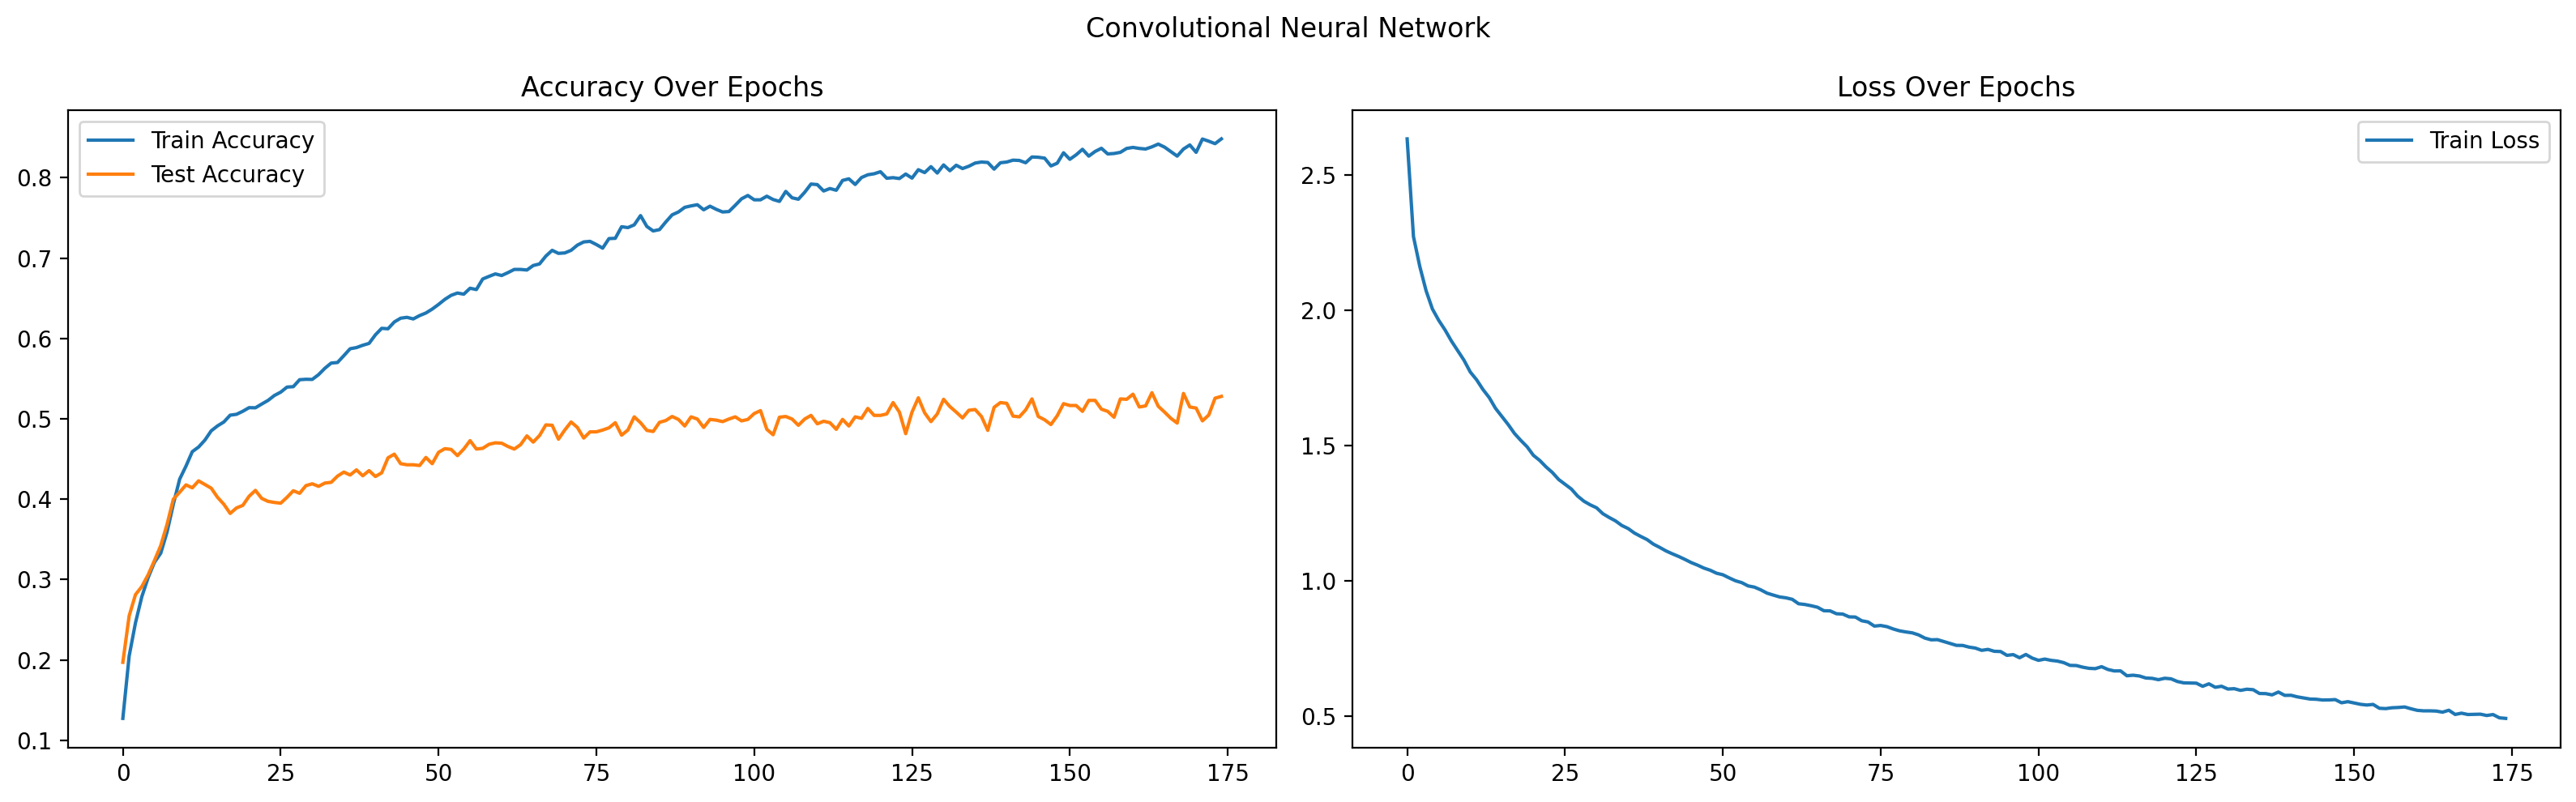

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5), dpi=200)

# Plot accuracy over epochs
ax[0].plot(train_accuracy_list, label="Train Accuracy")
ax[0].plot(test_accuracy_list, label="Test Accuracy")
ax[0].set_title("Accuracy Over Epochs")
ax[0].legend()

# Plot loss over epochs
ax[1].plot(train_loss_list, label="Train Loss")
ax[1].set_title("Loss Over Epochs")
ax[1].legend()

plt.suptitle("Convolutional Neural Network")
plt.tight_layout()
plt.show()

<Axes: >

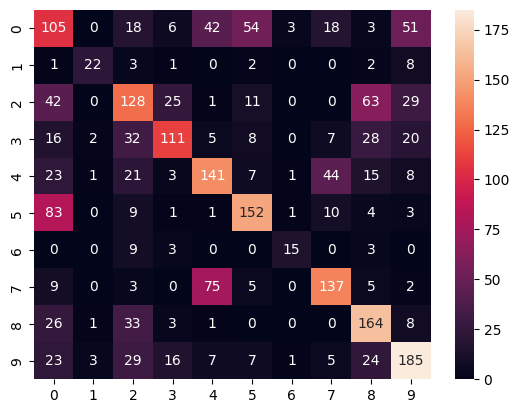

In [ ]:
import seaborn as sns

conf_mat = confusion_matrix(y_mel_test, last_y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')